Import required library



In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import re
import string

Import Fake and True dataset

In [179]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake (1).csv
Saving True.csv to True (1).csv


In [181]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [182]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [183]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [184]:
df_fake.tail(4)

,title,text,subject,date
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [185]:
#inserting new column "class" to cateogorise fake and true news
df_fake["class"]=0
df_true["class"]=1

In [186]:
df_fake.shape,df_true.shape

((23481, 5), (21417, 5))

In [187]:
df = pd.concat([df_fake, df_true],axis=0)
#merging true and fake dataframe

In [188]:
df['class'].value_counts(normalize=True)

class
0    0.522985
1    0.477015
Name: proportion, dtype: float64

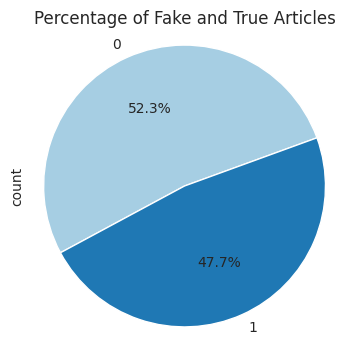

In [227]:
sns.set_palette("Paired")
sns.set_style("whitegrid")

plt.figure(figsize=(4, 4))
df['class'].value_counts().plot.pie( autopct='%1.1f%%',startangle=20)
plt.title('Percentage of Fake and True Articles')
plt.axis('equal')
plt.show()

<ipython-input-228-fba92e652d16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sns.countplot(x='class', data=dataFile,palette='Blues_d')


<Axes: xlabel='class', ylabel='count'>

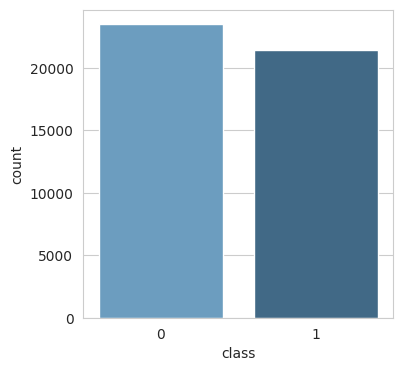

In [228]:
def create_distribution(dataFile):
    plt.figure(figsize=(4, 4))

    return sns.countplot(x='class', data=dataFile,palette='Blues_d')
create_distribution(df)

In [235]:
# we remove last 10 rows from both the dataset, to testing manually later
df_fake_testing=df_fake.tail(10)
df_fake = df_fake.iloc[:-10, :]

df_true_testing=df_true.tail(10)
df_true = df_true.iloc[:-10, :]


In [236]:
df_fake.shape,df_true.shape

((23451, 5), (21387, 5))

In [191]:
df_fake_testing["class"] = 0
df_true_testing["class"] = 1

In [237]:
df_fake_testing.head(10)

,title,text,subject,date,class
23451,3.57 Degrees: Kevin Bacon’s Cultural Mantle Sh...,21st Century Wire says Unless you have been li...,Middle-east,"February 9, 2016",0
23452,Bernie Sanders Could End Up Winning Iowa,21st Century Wire says Iowa s Democratic Party...,Middle-east,"February 4, 2016",0
23453,Plastic Persona: Behind the Scenes of the Ted ...,21st Century Wire says Most people accept that...,Middle-east,"February 4, 2016",0
23454,‘Meet Jeb’ – Going For Your Sympathy Vote,"21st Century Wire says As Republican, Ted Cruz...",Middle-east,"February 4, 2016",0
23455,"BOILER ROOM – Examination, Exclamation, Excita...",Tune in to the Alternate Current Radio Network...,Middle-east,"February 3, 2016",0
23456,Eyewash: CIA Elites Misleading Employees Indic...,21st Century Wire says The CIA is trying its b...,Middle-east,"February 3, 2016",0
23457,Activist: ‘This is where you can make the most...,21st Century Wire says If you ve been followin...,Middle-east,"February 3, 2016",0
23458,Episode #120 – SUNDAY WIRE: ‘Crisis of Liberty...,Episode #120 of SUNDAY WIRE SHOW finally resum...,Middle-east,"January 31, 2016",0
23459,FBI Release Oregon Video Footage Depicting Dea...,21st Century Wire says..UPDATE 1-29-2016 at 01...,Middle-east,"January 29, 2016",0
23460,Trial By YouTube: Mainstream Media Use Second-...,Patrick Henningsen 21st Century WireThere exi...,Middle-east,"January 28, 2016",0


In [238]:
df_true_testing.head(10)

,title,text,subject,date,class
21387,Former Libyan prime minister freed after abduc...,TRIPOLI (Reuters) - Former Libyan Prime Minist...,worldnews,"August 23, 2017",1
21388,Britain outlines plans to break free of Europe...,LONDON (Reuters) - Britain on Wednesday outlin...,worldnews,"August 22, 2017",1
21389,"Trump must be respected as U.S. president, say...",BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"August 23, 2017",1
21390,Pakistan rejects role of 'scapegoat for U.S. f...,"KARACHI, Pakistan (Reuters) - Pakistan has rej...",worldnews,"August 23, 2017",1
21391,Romanian president opposes plans for judicial ...,BUCHAREST (Reuters) - Romania s justice minist...,worldnews,"August 23, 2017",1
21392,"Iran, Saudi Arabia to exchange diplomatic visi...",BEIRUT (Reuters) - Iran and Saudi Arabia will ...,worldnews,"August 23, 2017",1
21393,Danish police identify torso as missing submar...,COPENHAGEN (Reuters) - Police on Wednesday ide...,worldnews,"August 23, 2017",1
21394,"Typhoon batters Hong Kong and south China, thr...","HONG KONG (Reuters) - Typhoon Hato, a maximum ...",worldnews,"August 22, 2017",1
21395,Poland to allocate additional $55 bllion on de...,WARSAW (Reuters) - Poland will allocate an add...,worldnews,"August 23, 2017",1
21396,Pro-Houthi fighters call powerful Yemen ally '...,DUBAI (Reuters) - Fighters loyal to the armed ...,worldnews,"August 23, 2017",1


In [194]:
df_testing = pd.concat([df_fake_testing,df_true_testing], axis = 0)
df_testing.to_csv("testing.csv")

In [195]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

"title", "subject" and "date" not required for fake news detection, hence removed

In [196]:
df = df.drop(["title", "subject","date"], axis = 1)

In [197]:
df.isnull().sum()

text     0
class    0
dtype: int64

Shuffling of data

In [231]:
df = df.sample(frac = 1)

In [239]:
df.head()

,text,class,cleaned_text
8125,"WEST PALM BEACH, Fla. (Reuters) - President Do...",1,west palm beach fla reuters president do...
25334,Filmmaker and author Phelim McAleer knew he wa...,0,filmmaker and author phelim mcaleer knew he wa...
39603,CARACAS/WASHINGTON/ (Reuters) - U.S. President...,1,caracas washington reuters u s president...
37180,You have to believe this junior Democratic Con...,0,you have to believe this junior democratic con...
37557,WELLINGTON (Reuters) - New Zealand Labour Part...,1,wellington reuters new zealand labour part...


In [240]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [201]:
df.columns

Index(['text', 'class'], dtype='object')

In [241]:
df.head()

,text,class,cleaned_text
0,"WEST PALM BEACH, Fla. (Reuters) - President Do...",1,west palm beach fla reuters president do...
1,Filmmaker and author Phelim McAleer knew he wa...,0,filmmaker and author phelim mcaleer knew he wa...
2,CARACAS/WASHINGTON/ (Reuters) - U.S. President...,1,caracas washington reuters u s president...
3,You have to believe this junior Democratic Con...,0,you have to believe this junior democratic con...
4,WELLINGTON (Reuters) - New Zealand Labour Part...,1,wellington reuters new zealand labour part...


Creating a function to remove url, chr.,punctuation, links and extra space. Also convert the text to lowercase.

In [242]:
def clean_text(input_text):
    cleaned_text = input_text.lower()
    cleaned_text = re.sub('\[.*?\]', '', cleaned_text)
    cleaned_text = re.sub("\\W"," ", cleaned_text)
    cleaned_text = re.sub('https?://\S+|www\.\S+', '', cleaned_text)
    cleaned_text = re.sub('<.*?>+', '', cleaned_text)
    cleaned_text = re.sub('[%s]' % re.escape(string.punctuation), '', cleaned_text)
    cleaned_text = re.sub('\n', '', cleaned_text)
    cleaned_text = re.sub('\w*\d\w*', '', cleaned_text)
    return cleaned_text

In [204]:
df["cleaned_text"] = df["text"].apply(clean_text)

In [243]:
#defining dependent and independent variable as x and y
x = df["text"]
y = df["class"]

Convert text to vector

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [245]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [244]:
#spliting the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Accuray using passive aggresive algorithm

In [248]:
#model training and validation
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import itertools
classifier = PassiveAggressiveClassifier(max_iter=1000)
classifier.fit(xv_train, y_train)
pred = classifier.predict(xv_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.995


**Confusion matrix**

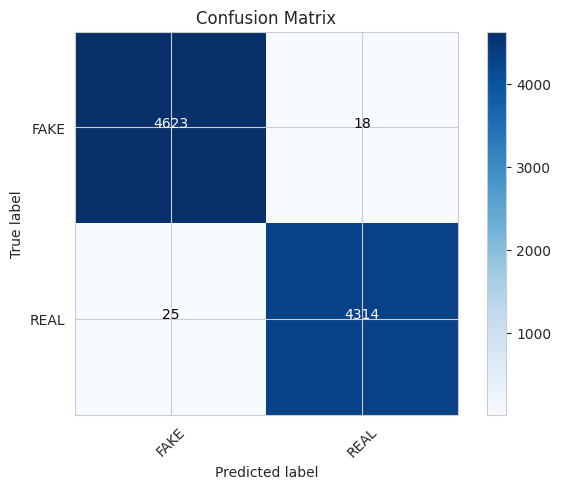

In [247]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have the y_test and pred variables
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, target_names=['FAKE', 'REAL'])

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9859625668449198

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4638
           1       0.99      0.99      0.99      4338

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



Decision Tree clssification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9946524064171123

In [249]:
def get_label_text(label_value):
    if label_value == 0:
        return "Fake News"
    elif label_value == 1:
        return "Not A Fake News"

def test_single_news(news_text):
    test_data = {"text": [news_text]}
    test_df = pd.DataFrame(test_data)
    test_df["text"] = test_df["text"].apply(clean_text)
    test_X = test_df["text"]
    test_X_vectorized = vectorization.transform(test_X)

    lr_prediction = LR.predict(test_X_vectorized)[0]
    dt_prediction = DT.predict(test_X_vectorized)[0]

    lr_label = get_label_text(lr_prediction)
    dt_label = get_label_text(dt_prediction)

    return print("\n\nLogistic Regression Prediction: {} \nDecision Tree Prediction: {}".format(lr_label, dt_label))


In [ ]:
news_text=str(input())
test_single_news(news_text)

this is sample news article


Logistic Regression Prediction: Fake News 
Decision Tree Prediction: Fake News


In [253]:
# Human-in-the-loop process

initial_accuracy = model.score(X_test, y_test)
print(f"Initial model accuracy: {initial_accuracy:.2f}")

while True:
    y_pred = model.predict(X_test)

    # Display the misclassified samples to the human
    misclassified_indices = np.where(y_pred != y_test)[0]
    if len(misclassified_indices) == 0:
        print("All samples are correctly classified. Training complete.")
        break

    print("Misclassified samples:")
    for i in misclassified_indices:
        print(f"Sample {i}: True label = {y_test[i]}, Predicted label = {y_pred[i]}")
        print(f"Features: {X_test[i]}")

    # Get feedback from the human
    human_feedback = input("Enter 'c' to correct the misclassified samples, or 'q' to quit: ")

    if human_feedback.lower() == 'c':
        # Correct the misclassified samples
        for i in misclassified_indices:
            correct_label = int(input(f"Enter the correct label for sample {i}: "))
            y_train[X_train.tolist().index(X_test[i].tolist())] = correct_label

        # Retrain the model with the corrected data
        model.fit(X_train, y_train)

        # Evaluate the updated model
        updated_accuracy = model.score(X_test, y_test)
        print(f"Updated model accuracy: {updated_accuracy:.2f}")
    elif human_feedback.lower() == 'q':
        break
    else:
        print("Invalid input. Please try again.")

Initial model accuracy: 1.00
All samples are correctly classified. Training complete.
